# Image preprocessing

In [1]:
import data_reader

import matplotlib.pyplot as plt
import numpy as np
import dataset

In [2]:
data_path = r"C:\Users\Alejandro\Desktop\heterogeneous-data\data\WSI\gdc_download_20220427_144600.480657"

#case_id = os.listdir(data_path) # For all data

PREPROCESS = True
DATA_SET_NAME = "test" #"data_set_x20_100%"

In [3]:
if PREPROCESS == True: # Choosing to preprocess the data or not

    for SPLIT in range(1):
        print(f"Procesando SPLIT: {SPLIT}")

        SPLIT_NAME = DATA_SET_NAME + f"_SPLIT{SPLIT}"

        case_id = open(f"C:\\Users\\Alejandro\\Desktop\\heterogeneous-data\\splits\\testsplit{SPLIT}.txt", "r").read().split()

        #case_id = ["0cde1b65-95b2-4046-a7c0-44461d928157", "0764e1e9-fc56-454d-80be-3b73b25db7e8"]

        paths = [data_path + "\\" + case for case in case_id] # All case folders paths

        data_r = data_reader.Data_reader(
            folder_name="gdc_download_20220427_144600.480657",
            formats=[".svs"])

        data_set = data_r.read_data(
                paths,
                patch_size=512,
                name = SPLIT_NAME)


train_set = dataset.PatchDataset([], [], [])

for SPLIT in range(1):
    SPLIT_NAME = DATA_SET_NAME + f"_SPLIT{SPLIT}"

    #SPLIT_NAME = "test"
    
    print(f"Loading split: {SPLIT}")
    X_, y_, n , ids = data_reader.read_lmdb(f"C:/Users/Alejandro/Desktop/heterogeneous-data/data/WSI/patches/{SPLIT_NAME}")

    train_set.inputs.extend(X_)
    train_set.labels.extend(y_)
    train_set.case_ids.extend(ids)

print(n)
print(f"Patches : {len(train_set)}\n")

X, y, case_id = train_set.inputs, train_set.labels, train_set.case_ids

Procesando SPLIT: 0


  4%|▍         | 1/25 [01:31<36:28, 91.19s/it]

Positive  C:\Users\Alejandro\Desktop\heterogeneous-data\data\WSI\gdc_download_20220427_144600.480657\0764e1e9-fc56-454d-80be-3b73b25db7e8\TCGA-Z5-AAPL-01A-01-TS1.42D048A2-E75F-480D-9274-1B6909661343.svs   01
TCGA-Z5-AAPL


  8%|▊         | 2/25 [01:56<20:00, 52.18s/it]

Negative  C:\Users\Alejandro\Desktop\heterogeneous-data\data\WSI\gdc_download_20220427_144600.480657\0cde1b65-95b2-4046-a7c0-44461d928157\TCGA-FB-AAQ2-11A-01-TSA.D08CA518-F20B-418F-96B2-C3A31B5D3F4F.svs   11
TCGA-FB-AAQ2


In [4]:
print(len(y))
print(len(X))
#print(case_id)


942
942


11
[0 1]


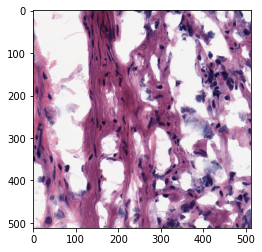

In [12]:
negative = [i for i in ids if "11" in(i)]

#print(negative)

example_idx = ids.index("X_0cde1b65-95b2-4046-a7c0-44461d928157_11")

print(example_idx)

plt.imshow(X[example_idx].reshape(512, 512, 3))
print(y[example_idx])

Number of patches:  148815
Percentage of positive patches:  0.8765850216712024


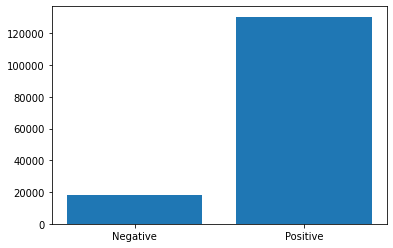

In [ ]:
positive = [(i[0]==1) for i in y].count(True)
plt.bar(["Negative", "Positive"], [len(y)-positive ,positive])

print("Number of patches: ", len(y))
print("Percentage of positive patches: ", positive/len(y))

[243 239 239 ... 155  67 110]
(786432,)


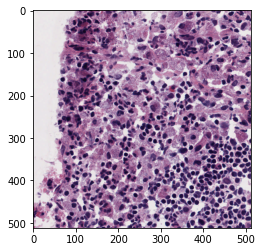

In [ ]:
idx = 200

#print(y[idx])

print(X[0])

print(X[idx].shape)

plt.imshow(X[idx].reshape(512, 512, 3))